In [ ]:
# Ellen Davenport April 2025
# This script is used to look at adjustments to TIWs in TPOSE due to the assimilation process

In [1]:
import cmocean.cm as cmo
import xarray as xr
from open_tpose import tpose2012_iter0, tpose2012
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

plt.rcParams['font.size'] = 14
prefix = ['diag_surf','diag_state']

# Open TPOSE 2012
ds_2012 = tpose2012(prefix)
N = len(ds_2012.time)
ds_2012['time'] = range(len(ds_2012.time))

lats = ds_2012.YC.data
lons = ds_2012.XC.data
depths = ds_2012.Z.data

# Open TPOSE 2012 iter0
ds_2012_iter0 = tpose2012_iter0(prefix)
N = len(ds_2012_iter0.time)
ds_2012_iter0['time'] = range(len(ds_2012_iter0.time))

opening 2012
Days in 2012: (should be 366)
366
setting up 2012
opening 2012
Days in 2012: (should be 366)
366


In [2]:
from Python.open_oisst import oisst2012to2013

# Open OISST data interpolated to TPOSE grid
oisst_data = oisst2012to2013()
print(oisst_data.shape)
oisst_data = oisst_data.transpose(2,1,0)

# add oisst data to ds and set the dimensions to be ds.time ds.XC and ds.YC, only looking at 2012 limit to 366 days
ds_2012['oisst'] = (('time','YC','XC'), oisst_data[:366,:,:])

(1128, 336, 731)


In [3]:
# set region of interest
latMin = -10.0
latMax = 10.0
latli = np.argmin(np.abs(lats - latMin))
latui = np.argmin(np.abs(lats - latMax)) + 1
lonMin = 190.0
lonMax = 250.0
lonli = np.argmin(np.abs(lons - lonMin))
lonui = np.argmin(np.abs(lons - lonMax)) + 1

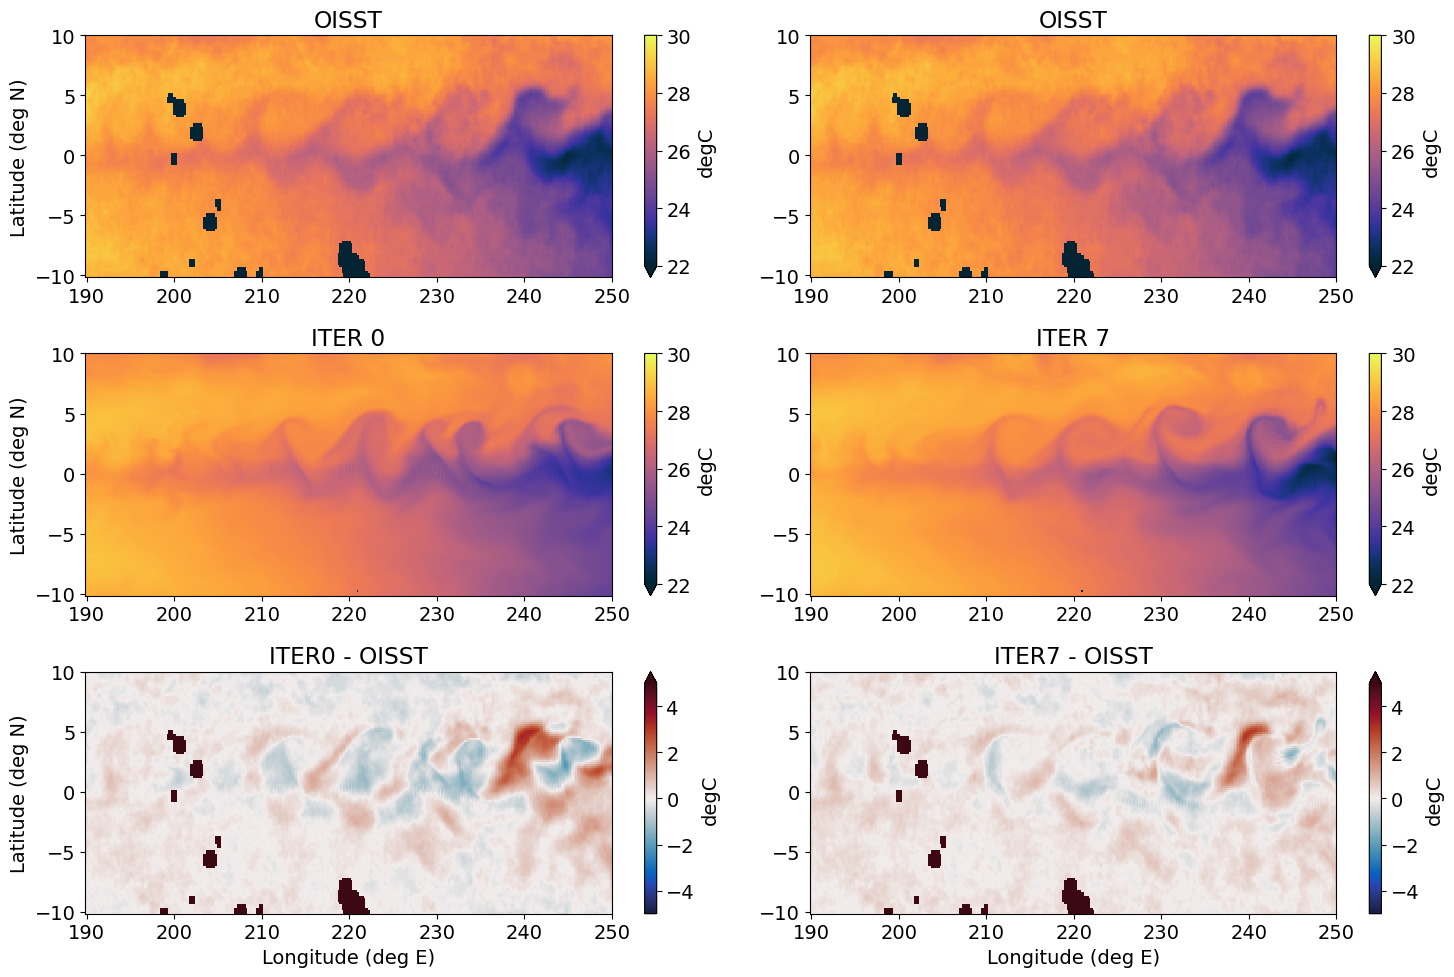

In [14]:
# Plot the same day in iteration 0 and iteration 7 versus OISST
vmin = 22
vmax = 30
day = 250
fig, ax = plt.subplots(figsize=(15,10), nrows=3,ncols=2)
ds_2012.oisst[day,latli:latui,lonli:lonui].plot(ax=ax[0,0],cmap=cmo.thermal,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[0,0].set_title('OISST')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Latitude (deg N)')
ds_2012_iter0.THETA[day,0,latli:latui,lonli:lonui].plot(ax=ax[1,0],cmap=cmo.thermal,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[1,0].set_title('ITER 0')
ax[1,0].set_ylabel('Latitude (deg N)')
ax[1,0].set_xlabel('')
vmin = -5
vmax = 5
(ds_2012_iter0.THETA[day,0,latli:latui,lonli:lonui]-ds_2012.oisst[day,latli:latui,lonli:lonui]).plot(ax=ax[2,0],cmap=cmo.balance,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[2,0].set_title('ITER0 - OISST')
ax[2,0].set_ylabel('Latitude (deg N)')
ax[2,0].set_xlabel('Longitude (deg E)')

vmin = 22
vmax = 30
ds_2012.oisst[day,latli:latui,lonli:lonui].plot(ax=ax[0,1],cmap=cmo.thermal,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[0,1].set_title('OISST')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ds_2012.THETA[day,0,latli:latui,lonli:lonui].plot(ax=ax[1,1],cmap=cmo.thermal,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[1,1].set_title('ITER 7')
ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')
vmin = -5
vmax = 5
(ds_2012.THETA[day,0,latli:latui,lonli:lonui] - ds_2012.oisst[day,latli:latui,lonli:lonui]).plot(ax=ax[2,1],cmap=cmo.balance,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[2,1].set_title('ITER7 - OISST')
ax[2,1].set_ylabel('')
ax[2,1].set_xlabel('Longitude (deg E)')

plt.tight_layout()

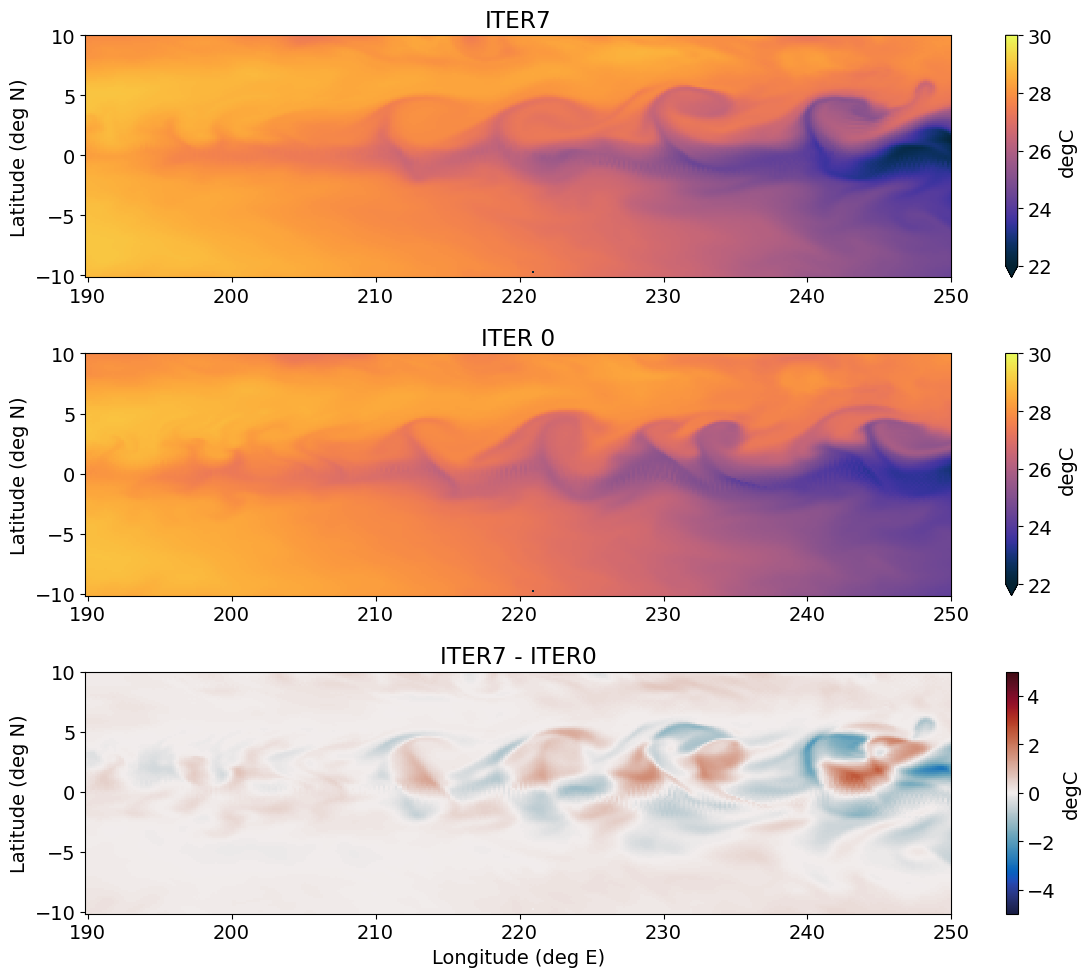

In [15]:
# Plot the difference between iter0 and iter7 for the same day
vmin = 22
vmax = 30
day = 250
fig, ax = plt.subplots(figsize=(12,10), nrows=3)
ds_2012.THETA[day,0,latli:latui,lonli:lonui].plot(ax=ax[0],cmap=cmo.thermal,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[0].set_title('ITER7')
ax[0].set_xlabel('')
ax[0].set_ylabel('Latitude (deg N)')
ds_2012_iter0.THETA[day,0,latli:latui,lonli:lonui].plot(ax=ax[1],cmap=cmo.thermal,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[1].set_title('ITER 0')
ax[1].set_ylabel('Latitude (deg N)')
ax[1].set_xlabel('')
vmin = -5
vmax = 5
(ds_2012.THETA[day,0,latli:latui,lonli:lonui]-ds_2012_iter0.THETA[day,0,latli:latui,lonli:lonui]).plot(ax=ax[2],cmap=cmo.balance,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[2].set_title('ITER7 - ITER0')
ax[2].set_ylabel('Latitude (deg N)')
ax[2].set_xlabel('Longitude (deg E)')

plt.tight_layout()

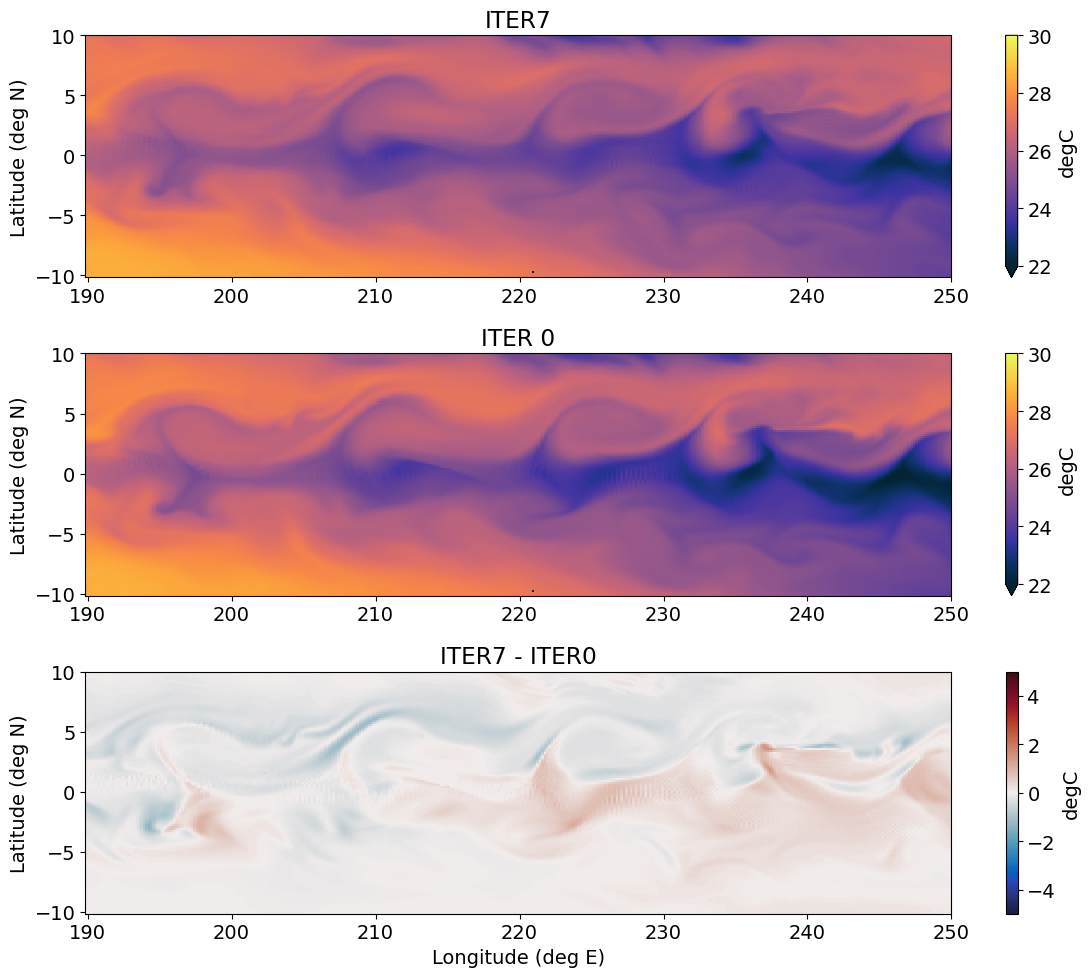

In [18]:
# Plot the difference between iter0 and iter7 for the same day
vmin = 22
vmax = 30
day = 10
fig, ax = plt.subplots(figsize=(12,10), nrows=3)
ds_2012.THETA[day,0,latli:latui,lonli:lonui].plot(ax=ax[0],cmap=cmo.thermal,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[0].set_title('ITER7')
ax[0].set_xlabel('')
ax[0].set_ylabel('Latitude (deg N)')
ds_2012_iter0.THETA[day,0,latli:latui,lonli:lonui].plot(ax=ax[1],cmap=cmo.thermal,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[1].set_title('ITER 0')
ax[1].set_ylabel('Latitude (deg N)')
ax[1].set_xlabel('')
vmin = -5
vmax = 5
(ds_2012.THETA[day,0,latli:latui,lonli:lonui]-ds_2012_iter0.THETA[day,0,latli:latui,lonli:lonui]).plot(ax=ax[2],cmap=cmo.balance,cbar_kwargs={'label':'degC'},vmin=vmin,vmax=vmax)
ax[2].set_title('ITER7 - ITER0')
ax[2].set_ylabel('Latitude (deg N)')
ax[2].set_xlabel('Longitude (deg E)')

plt.tight_layout()

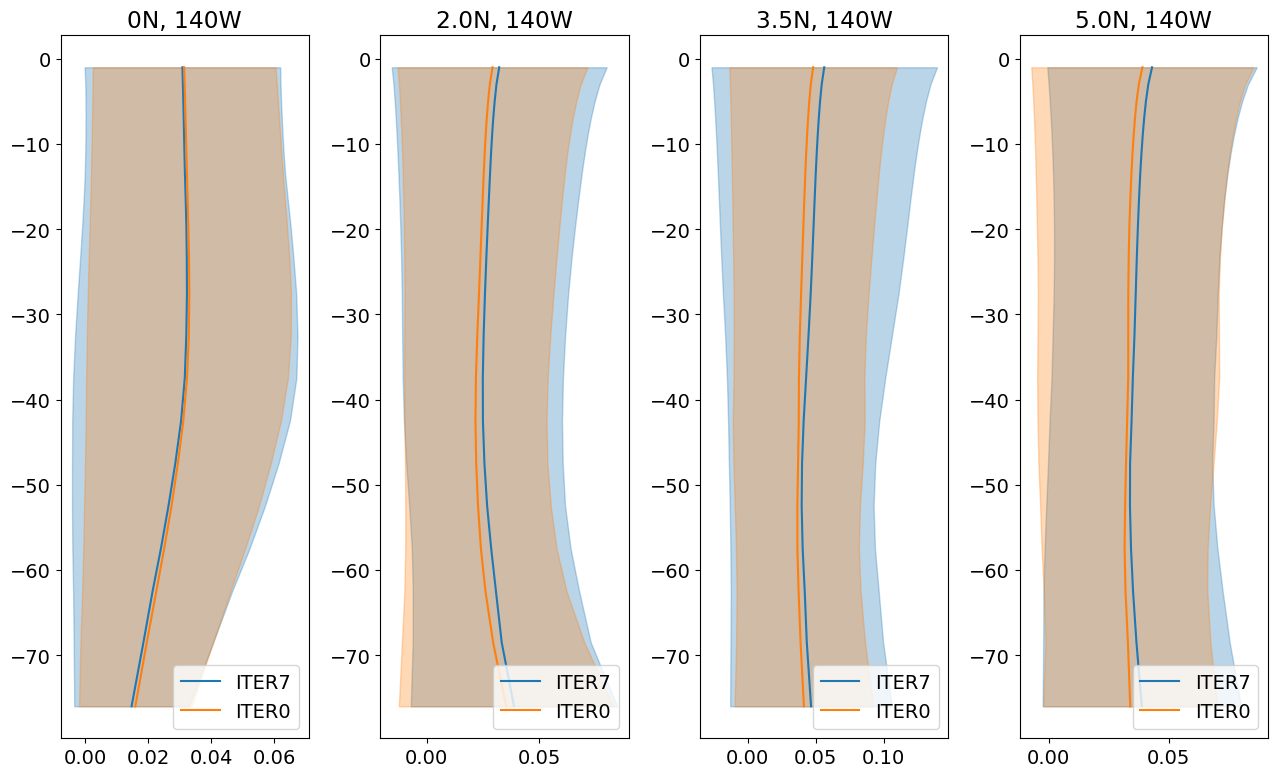

In [3]:
# Plot change in mean and std deviation of the meridional velocities at different latitudes (140W)
latidx = 0.0
lonidx = 220.0
depthMax = 0.0
depthMin = -75.0
latui = np.argmin(np.abs(lats - latidx)) + 1
lonui = np.argmin(np.abs(lons - lonidx)) + 1
depthli = np.argmin(np.abs(depths - depthMax))
depthui = np.argmin(np.abs(depths - depthMin)) + 1

merid_vel = 0.5 * (ds_2012.VVEL[270:,depthli:depthui,latui,lonui]**2).mean(dim='time')
merid_velstd = 0.5 * (ds_2012.VVEL[270:,depthli:depthui,latui,lonui]**2).std(dim='time')
merid_vel0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthli:depthui,latui,lonui]**2).mean(dim='time')
merid_velstd0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthli:depthui,latui,lonui]**2).std(dim='time')

fig, ax = plt.subplots(figsize=(13,8), ncols=4)
ax[0].plot(merid_vel,merid_vel.Z,label='ITER7',color='tab:blue')
ax[0].fill_betweenx(merid_vel.Z,merid_vel-merid_velstd,merid_vel+merid_velstd,alpha=0.3,color='tab:blue')
ax[0].plot(merid_vel0,merid_vel0.Z,label='ITER0',color='tab:orange')
ax[0].fill_betweenx(merid_vel.Z,merid_vel0-merid_velstd0,merid_vel0+merid_velstd0,alpha=0.3,color='tab:orange')
ax[0].set_title('0N, 140W')
ax[0].legend(loc='lower right')

latidx = 2.0
latui = np.argmin(np.abs(lats - latidx)) + 1
merid_vel = 0.5 * (ds_2012.VVEL[270:,depthli:depthui,latui,lonui]**2).mean(dim='time')
merid_velstd = 0.5 * (ds_2012.VVEL[270:,depthli:depthui,latui,lonui]**2).std(dim='time')
merid_vel0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthli:depthui,latui,lonui]**2).mean(dim='time')
merid_velstd0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthli:depthui,latui,lonui]**2).std(dim='time')

ax[1].plot(merid_vel,merid_vel.Z,label='ITER7',color='tab:blue')
ax[1].fill_betweenx(merid_vel.Z,merid_vel-merid_velstd,merid_vel+merid_velstd,alpha=0.3,color='tab:blue')
ax[1].plot(merid_vel0,merid_vel0.Z,label='ITER0',color='tab:orange')
ax[1].fill_betweenx(merid_vel.Z,merid_vel0-merid_velstd0,merid_vel0+merid_velstd0,alpha=0.3,color='tab:orange')
ax[1].set_title('2.0N, 140W')
ax[1].legend(loc='lower right')

latidx = 3.5
latui = np.argmin(np.abs(lats - latidx)) + 1
merid_vel = 0.5 * (ds_2012.VVEL[270:,depthli:depthui,latui,lonui]**2).mean(dim='time')
merid_velstd = 0.5 * (ds_2012.VVEL[270:,depthli:depthui,latui,lonui]**2).std(dim='time')
merid_vel0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthli:depthui,latui,lonui]**2).mean(dim='time')
merid_velstd0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthli:depthui,latui,lonui]**2).std(dim='time')

ax[2].plot(merid_vel,merid_vel.Z,label='ITER7',color='tab:blue')
ax[2].fill_betweenx(merid_vel.Z,merid_vel-merid_velstd,merid_vel+merid_velstd,alpha=0.3,color='tab:blue')
ax[2].plot(merid_vel0,merid_vel0.Z,label='ITER0',color='tab:orange')
ax[2].fill_betweenx(merid_vel.Z,merid_vel0-merid_velstd0,merid_vel0+merid_velstd0,alpha=0.3,color='tab:orange')
ax[2].set_title('3.5N, 140W')
ax[2].legend(loc='lower right')

latidx = 5.0
latui = np.argmin(np.abs(lats - latidx)) + 1
merid_vel = 0.5 * (ds_2012.VVEL[270:,depthli:depthui,latui,lonui]**2).mean(dim='time')
merid_velstd = 0.5 * (ds_2012.VVEL[270:,depthli:depthui,latui,lonui]**2).std(dim='time')
merid_vel0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthli:depthui,latui,lonui]**2).mean(dim='time')
merid_velstd0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthli:depthui,latui,lonui]**2).std(dim='time')

ax[3].plot(merid_vel,merid_vel.Z,label='ITER7',color='tab:blue')
ax[3].fill_betweenx(merid_vel.Z,merid_vel-merid_velstd,merid_vel+merid_velstd,alpha=0.3,color='tab:blue')
ax[3].plot(merid_vel0,merid_vel0.Z,label='ITER0',color='tab:orange')
ax[3].fill_betweenx(merid_vel.Z,merid_vel0-merid_velstd0,merid_vel0+merid_velstd0,alpha=0.3,color='tab:orange')
ax[3].set_title('5.0N, 140W')
ax[3].legend(loc='lower right')

plt.tight_layout()

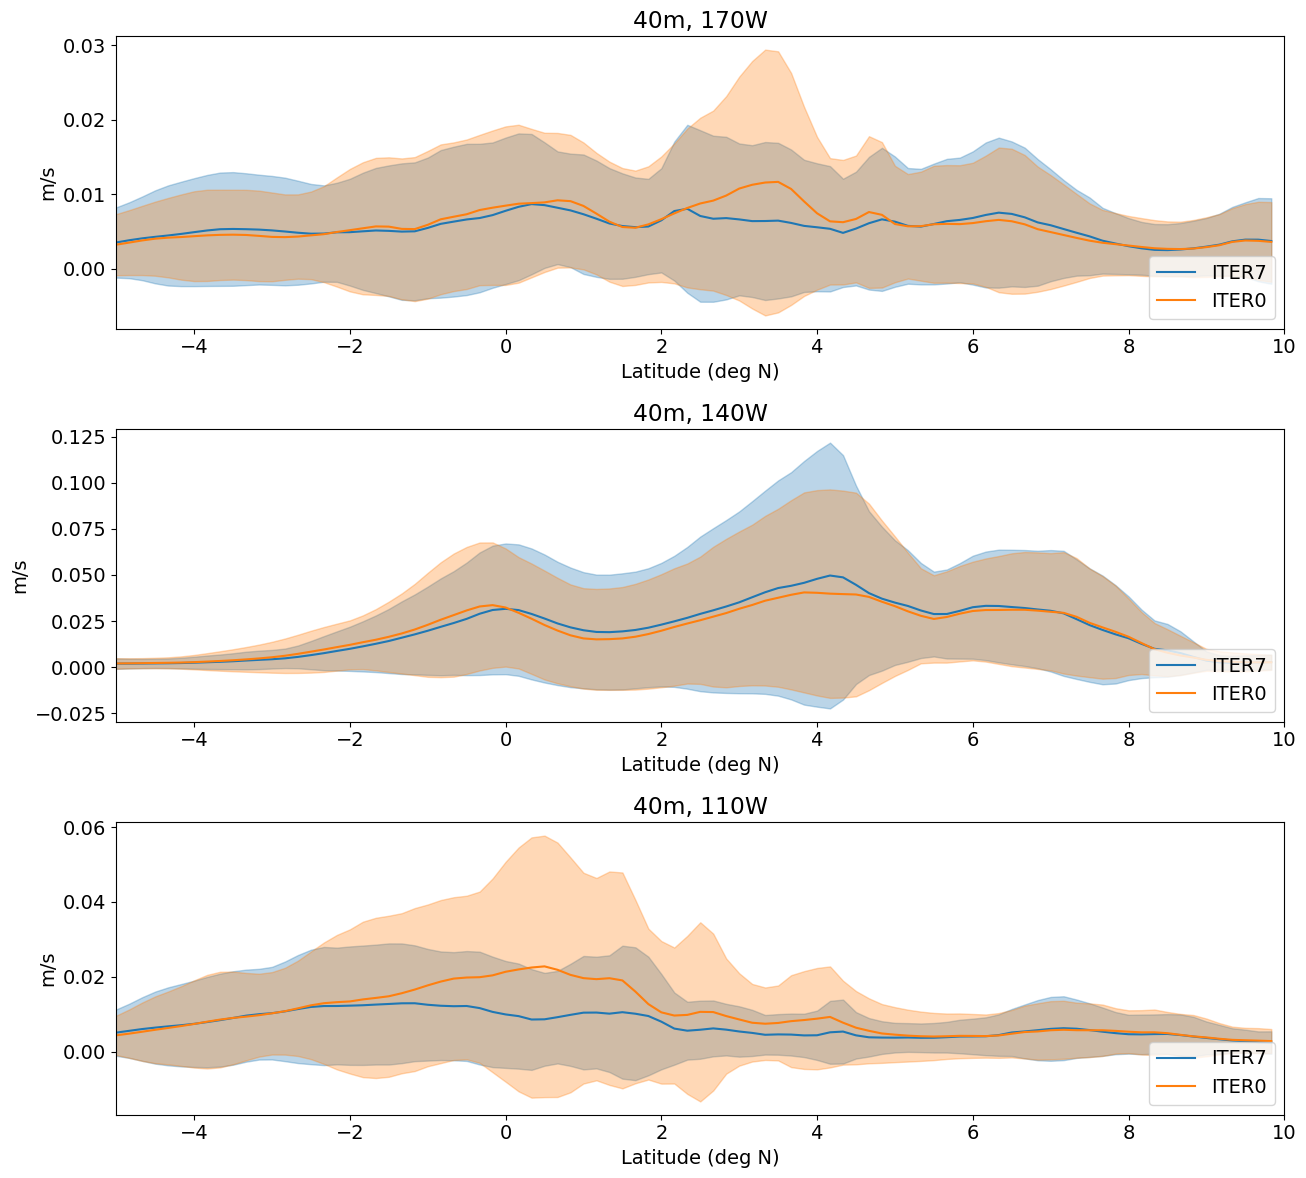

In [18]:
# Plot change in meridional velocity at 40m with latitude at 3 longitudes
lonidx = 190.0
depth = -40.0
latMin = -5.0
latMax = 10.0
latli = np.argmin(np.abs(lats - latMin))
latui = np.argmin(np.abs(lats - latMax)) + 1
lonui = np.argmin(np.abs(lons - lonidx)) + 1
depthidx = np.argmin(np.abs(depths - depth))

merid_vel = 0.5 * (ds_2012.VVEL[270:,depthidx,latli:latui,lonui]**2).mean(dim='time')
merid_velstd = 0.5 * (ds_2012.VVEL[270:,depthidx,latli:latui,lonui]**2).std(dim='time')
merid_vel0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthidx,latli:latui,lonui]**2).mean(dim='time')
merid_velstd0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthidx,latli:latui,lonui]**2).std(dim='time')

fig, ax = plt.subplots(figsize=(13,12),nrows=3)
ax[0].plot(merid_vel.YG,merid_vel,label='ITER7',color='tab:blue')
ax[0].fill_between(merid_vel.YG,merid_vel-merid_velstd,merid_vel+merid_velstd,alpha=0.3,color='tab:blue')
ax[0].plot(merid_vel.YG,merid_vel0,label='ITER0',color='tab:orange')
ax[0].fill_between(merid_vel.YG,merid_vel0-merid_velstd0,merid_vel0+merid_velstd0,alpha=0.3,color='tab:orange')
ax[0].set_title('40m, 170W')
ax[0].set_xlabel('Latitude (deg N)')
ax[0].set_ylabel('m/s')
ax[0].set_xlim([-5.0,10.0])
ax[0].legend(loc='lower right')

lonidx = 220.0
lonui = np.argmin(np.abs(lons - lonidx)) + 1
merid_vel = 0.5 * (ds_2012.VVEL[270:,depthidx,latli:latui,lonui]**2).mean(dim='time')
merid_velstd = 0.5 * (ds_2012.VVEL[270:,depthidx,latli:latui,lonui]**2).std(dim='time')
merid_vel0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthidx,latli:latui,lonui]**2).mean(dim='time')
merid_velstd0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthidx,latli:latui,lonui]**2).std(dim='time')

ax[1].plot(merid_vel.YG,merid_vel,label='ITER7',color='tab:blue')
ax[1].fill_between(merid_vel.YG,merid_vel-merid_velstd,merid_vel+merid_velstd,alpha=0.3,color='tab:blue')
ax[1].plot(merid_vel.YG,merid_vel0,label='ITER0',color='tab:orange')
ax[1].fill_between(merid_vel.YG,merid_vel0-merid_velstd0,merid_vel0+merid_velstd0,alpha=0.3,color='tab:orange')
ax[1].set_title('40m, 140W')
ax[1].set_xlabel('Latitude (deg N)')
ax[1].set_ylabel('m/s')
ax[1].set_xlim([-5.0,10.0])
ax[1].legend(loc='lower right')

lonidx = 250.0
lonui = np.argmin(np.abs(lons - lonidx)) + 1
merid_vel = 0.5 * (ds_2012.VVEL[270:,depthidx,latli:latui,lonui]**2).mean(dim='time')
merid_velstd = 0.5 * (ds_2012.VVEL[270:,depthidx,latli:latui,lonui]**2).std(dim='time')
merid_vel0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthidx,latli:latui,lonui]**2).mean(dim='time')
merid_velstd0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthidx,latli:latui,lonui]**2).std(dim='time')
ax[2].plot(merid_vel.YG,merid_vel,label='ITER7',color='tab:blue')
ax[2].fill_between(merid_vel.YG,merid_vel-merid_velstd,merid_vel+merid_velstd,alpha=0.3,color='tab:blue')
ax[2].plot(merid_vel.YG,merid_vel0,label='ITER0',color='tab:orange')
ax[2].fill_between(merid_vel.YG,merid_vel0-merid_velstd0,merid_vel0+merid_velstd0,alpha=0.3,color='tab:orange')
ax[2].set_title('40m, 110W')
ax[2].set_xlabel('Latitude (deg N)')
ax[2].set_ylabel('m/s')
ax[2].set_xlim([-5.0,10.0])
ax[2].legend(loc='lower right')

plt.tight_layout()

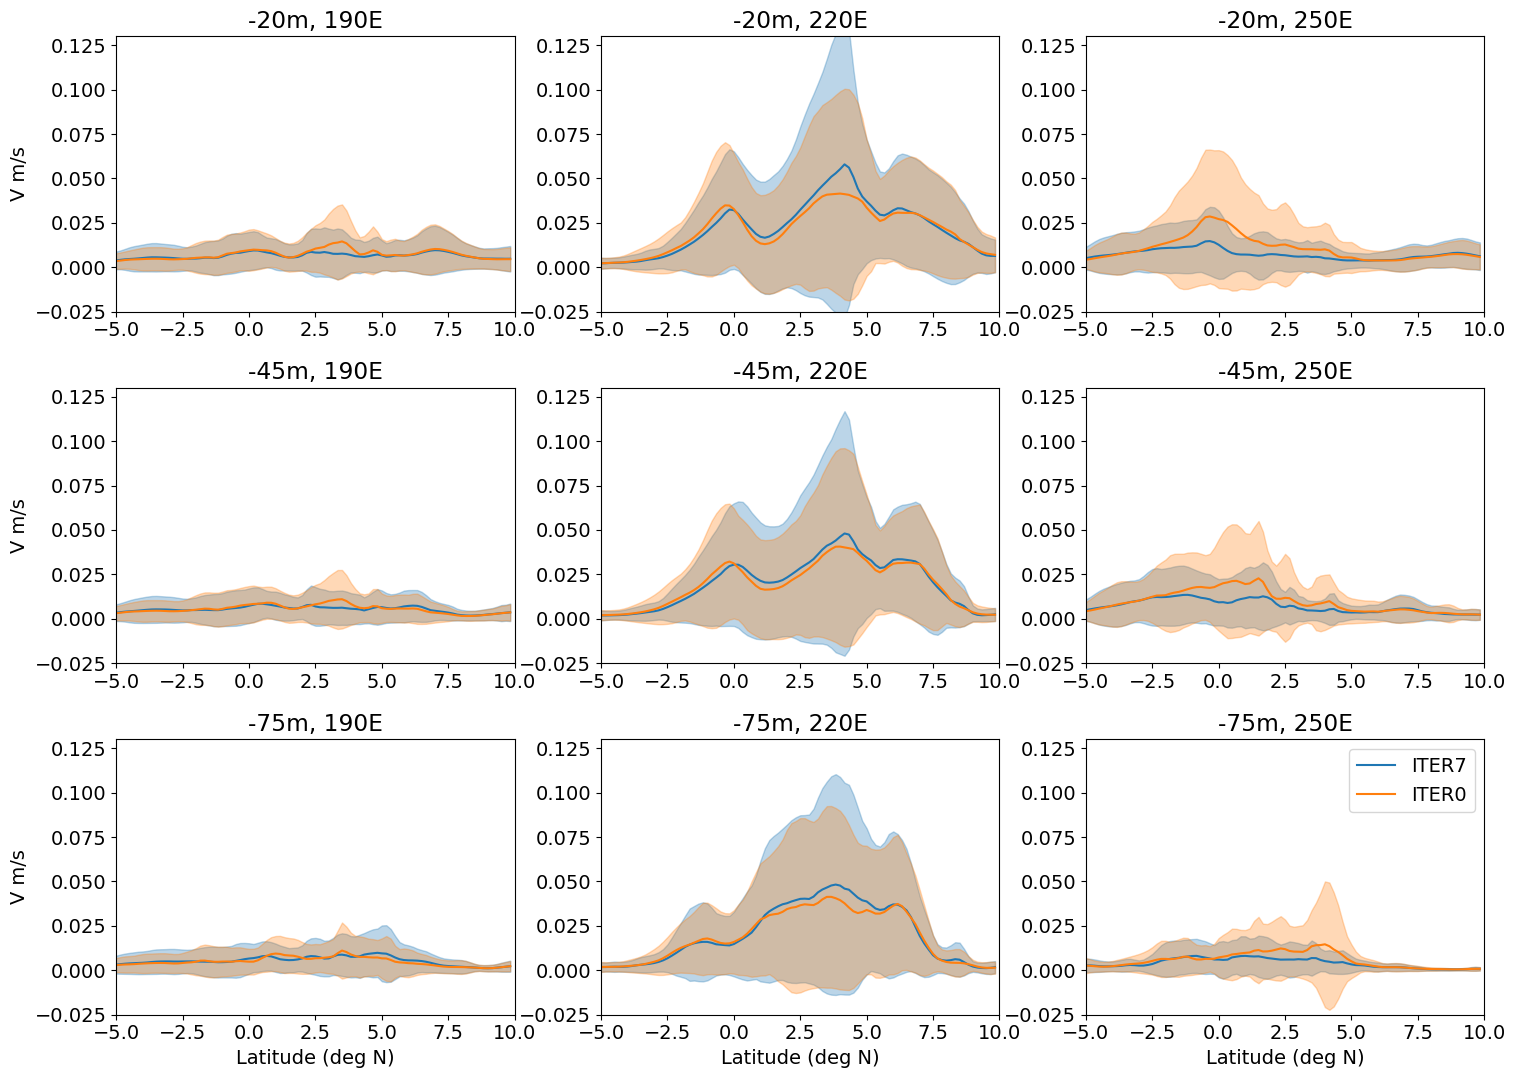

In [31]:
# same as above but at 3 depths
lon = np.array([190.0, 220.0, 250.0])
depth = np.array([-20.0, -45.0, -75.0])
latMin = -5.0
latMax = 10.0
latli = np.argmin(np.abs(lats - latMin))
latui = np.argmin(np.abs(lats - latMax)) + 1

fig, ax = plt.subplots(figsize=(15,11),nrows=3, ncols=3)

for i in range(3):
    for j in range(3):
        lon_i = lon[j]
        depth_l = depth[i]
        lonui = np.argmin(np.abs(lons - lon_i)) + 1
        depthidx = np.argmin(np.abs(depths - depth_l))
        merid_vel = 0.5 * (ds_2012.VVEL[270:,depthidx,latli:latui,lonui]**2).mean(dim='time')
        merid_velstd = 0.5 * (ds_2012.VVEL[270:,depthidx,latli:latui,lonui]**2).std(dim='time')
        merid_vel0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthidx,latli:latui,lonui]**2).mean(dim='time')
        merid_velstd0 = 0.5 * (ds_2012_iter0.VVEL[270:,depthidx,latli:latui,lonui]**2).std(dim='time')

        axis = ax[i,j]
        axis.plot(merid_vel.YG,merid_vel,label='ITER7',color='tab:blue')
        axis.fill_between(merid_vel.YG,merid_vel-merid_velstd,merid_vel+merid_velstd,alpha=0.3,color='tab:blue')
        axis.plot(merid_vel.YG,merid_vel0,label='ITER0',color='tab:orange')
        axis.fill_between(merid_vel.YG,merid_vel0-merid_velstd0,merid_vel0+merid_velstd0,alpha=0.3,color='tab:orange')
        title = str(int(depth_l)) + 'm, ' + str(int(lon_i)) + 'E'
        axis.set_title(title)
        axis.set_xlim([-5.0,10.0])
        axis.set_ylim([-0.025,0.13])
        if i == 2:
            axis.set_xlabel('Latitude (deg N)')
    ax[i,0].set_ylabel('V m/s')

ax[2,2].legend(loc='upper right')

plt.tight_layout()